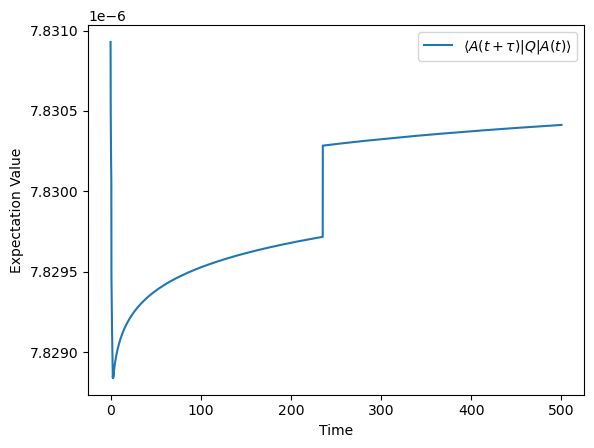

In [5]:
from qutip import *
import numpy as np
import matplotlib.pyplot as plt

N = 10  # Fock空间维度
b1 = tensor(destroy(N), qeye(N))  
b2 = tensor(qeye(N), destroy(N))  
omega = 1.0
g_0 = 0.1

# 定义系统的哈密顿量 H 和观测量 Q
H0 = omega * (b1.dag() * b1 + b2.dag() * b2 + 1)
H1 = g_0/(omega**2) * ((b1.dag() + b1)**2) * ((b2.dag() + b2)**2)
H = H0 + H1  # 哈密顿量
Q = b1.dag() * b1 * b2 * b2  # 观测量

psi0 = tensor(basis(N, 0), basis(N, 0))  # 两个谐振子的基态

# 定义时间范围和时间间隔
t_list = np.linspace(0, 500, 100000) # 时间范围
tau = 0.01  # 时间间隔

# 计算随时间演化的期望值
expectation_values = []

for t in t_list:
    result = mesolve(H, psi0, [t, t + tau], [b1.dag() * b1 * b2 * b2])
    A_t_plus_tau = result.states[-1]
    expectation_value = expect(Q, A_t_plus_tau)
    expectation_values.append(expectation_value)

# 绘制结果
plt.plot(t_list, expectation_values, label=r'$\langle A(t+\tau) | Q | A(t) \rangle$')
plt.xlabel('Time')
plt.ylabel('Expectation Value')
plt.legend()
plt.show()
